# Regression modelling on Credit card data set

After looking into the data set, let us move into the modelling part. The target feature is "LIMIT_BAL". There is two ways this problem can be approached. It can be seen as a regression problem or by discretising the "LIMIT_BAL", it can be turned into a classification problem.There is few things we need to consider to decide if we want to approach it as classification. We can discuss this later. Here let us first consider this as a regression problem 

### Loading the libraries

In [2]:
#DS Basics
import pandas as pd
import numpy as np
import matplotlib as mpl
#interactive decision tree
import matplotlib.pyplot as plt
#helpers
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
#discretization
import feature_engine.discretisers as feature_discretisers
from sklearn.inspection import plot_partial_dependence

import warnings
warnings.simplefilter('ignore')

In [3]:
#profiling
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer

In [4]:
#PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import scipy

In [5]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

Note that linearRegression is all estimators.

In [6]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
mpl.rcParams['figure.figsize'] = (10,10)

In [8]:
from math import sqrt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.svm import SVC, SVR
from sklearn.feature_selection import SelectFromModel

In [10]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [11]:
import statsmodels.api as sm
from sklearn import feature_selection
from sklearn.feature_selection import RFE

In [12]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
import time

In [13]:
# import rfpimp
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile
# from rfpimp import permutation_importances

# import eli5
# from eli5.sklearn import PermutationImportance


import lime
import lime.lime_tabular
from sklearn.base import clone
from treeinterpreter import treeinterpreter as ti, utils

### Loading & clean up of the data

In [43]:
credit = pd.read_csv("default of credit card clients.csv", header=1) 

In [44]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [45]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [46]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [47]:
credit.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [48]:
# If you want to remane any col, just assign that col to the new col name
# & delete the unwanted col
credit['default'] = credit['default payment next month']

In [49]:
credit = credit.drop(['ID','default payment next month'], axis=1)
#overriding data set with the same data set after removing duplicate 
credit = credit.drop_duplicates()
print(credit.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


Converting non-numeric to numeric

Converting Sex & default using label encoder

In [50]:
# To encode the the col... lets say to convert the non-numeric
# to numeric u can use this
#Label encoding
le = LabelEncoder()
le.fit(credit['default'])
credit['default'] = le.transform(credit['default'])
credit['default']

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: default, Length: 29965, dtype: int32

In [51]:
le = LabelEncoder()
le.fit(credit['SEX'])
credit['SEX_list'] = le.transform(credit['SEX'])
# credit['SEX_list']

Marriage & education are catagorical variable with more than 2 options. So rather than label encoding, we can convert them into numerical features by one-hot encoding

In [52]:
convertedCol1 = credit.loc[:,'MARRIAGE']
convertedCol2 = credit.loc[:,['EDUCATION']] # selecting the required cols
convertedCol1 = pd.get_dummies(convertedCol1)#converting them using dummies fn
convertedCol2 = pd.get_dummies(convertedCol2)
credit = pd.concat([credit,convertedCol1,convertedCol2],axis=1)

In [53]:
credit['Married_other']=credit[0]
credit['Married_married']=credit[1]
credit['Married_single']=credit[2]
credit['Married_divorce']=credit[3]
# credit.head()

In [54]:
credit = credit.drop(['SEX','EDUCATION','MARRIAGE',0,1,2,3],axis=1)
credit.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,default,SEX_list,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,Married_other,Married_married,Married_single,Married_divorce
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,0,1,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,0,0,1,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1,0,0,0,0,1,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1,0,0,0,0,1,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,1,1,0,0,0,1,0,1,0,0


Now it's time to think, is there any problem in the features of credit data set. Will any chance any feature can be misunderstood or any catogory that can be further divided. Pay_0 is the payment status & in that -2 represents no consuption & -1 represents payment in full. Which both are good. There can be a chance regression model might misunderstand negative as bad. So it is an option to make the negative to 0, as to consolidate all the good ones

In [55]:
credit['PAY_0'] = credit['PAY_0'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)

credit['PAY_0'] = credit['PAY_0'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

# Modelling 

Dividing the data set into training & test data. 

In [27]:
#divinding into x & y
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

In [27]:
algoClass=[]
algoClass.append(('Linear Regression',LinearRegression()))
algoClass.append(('Random Forest Regressor',RandomForestRegressor()))
algoClass.append(('Support vector Regression',SVR()))

In [28]:
results = []
names =[]

for name, model in algoClass:
    result = cross_val_score(model, X, y, cv = 3, scoring='r2')
    names.append(name)
    results.append(result)
for i in range(len(results)):
    print(names[i],results[i].mean())
    


Linear Regression 0.28720253989958994
Random Forest Regressor 0.46547849089497123
Support vector Regression -0.05034206096313872


After looking the above, SVR has the lowest r2 score & random forest being the highest. Even though SVR has very low value by adjusting the paramters we might see a differnce. 

In [29]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
model = svr_rbf.fit(X_train,y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

102012.95785395613

In [30]:
rmse = sqrt(mean_squared_error(y_test, pred))
rsquare = r2_score(y_test, pred)
print('R squared: %.3f '% rsquare)
print('RMSE: %.3f '% rmse)

R squared: -0.038 
RMSE: 131959.846 


We have methods to find out the best fit parameters that can be used for SVR inorder to improve it. We will discuss this shortly

Since this is a Regression problem you will use RMSE and R squared to measure the trained model.So why didn't you import a metric called RMSE? RMSE is just the Square Root of MSE (mean squared error) so you will also need to ensure that we've also included the sqrt function from the math library during import:

from math import sqrt

### Feature selection

certain features can make the model to perform badly. So it is important to choose which are the optimal features

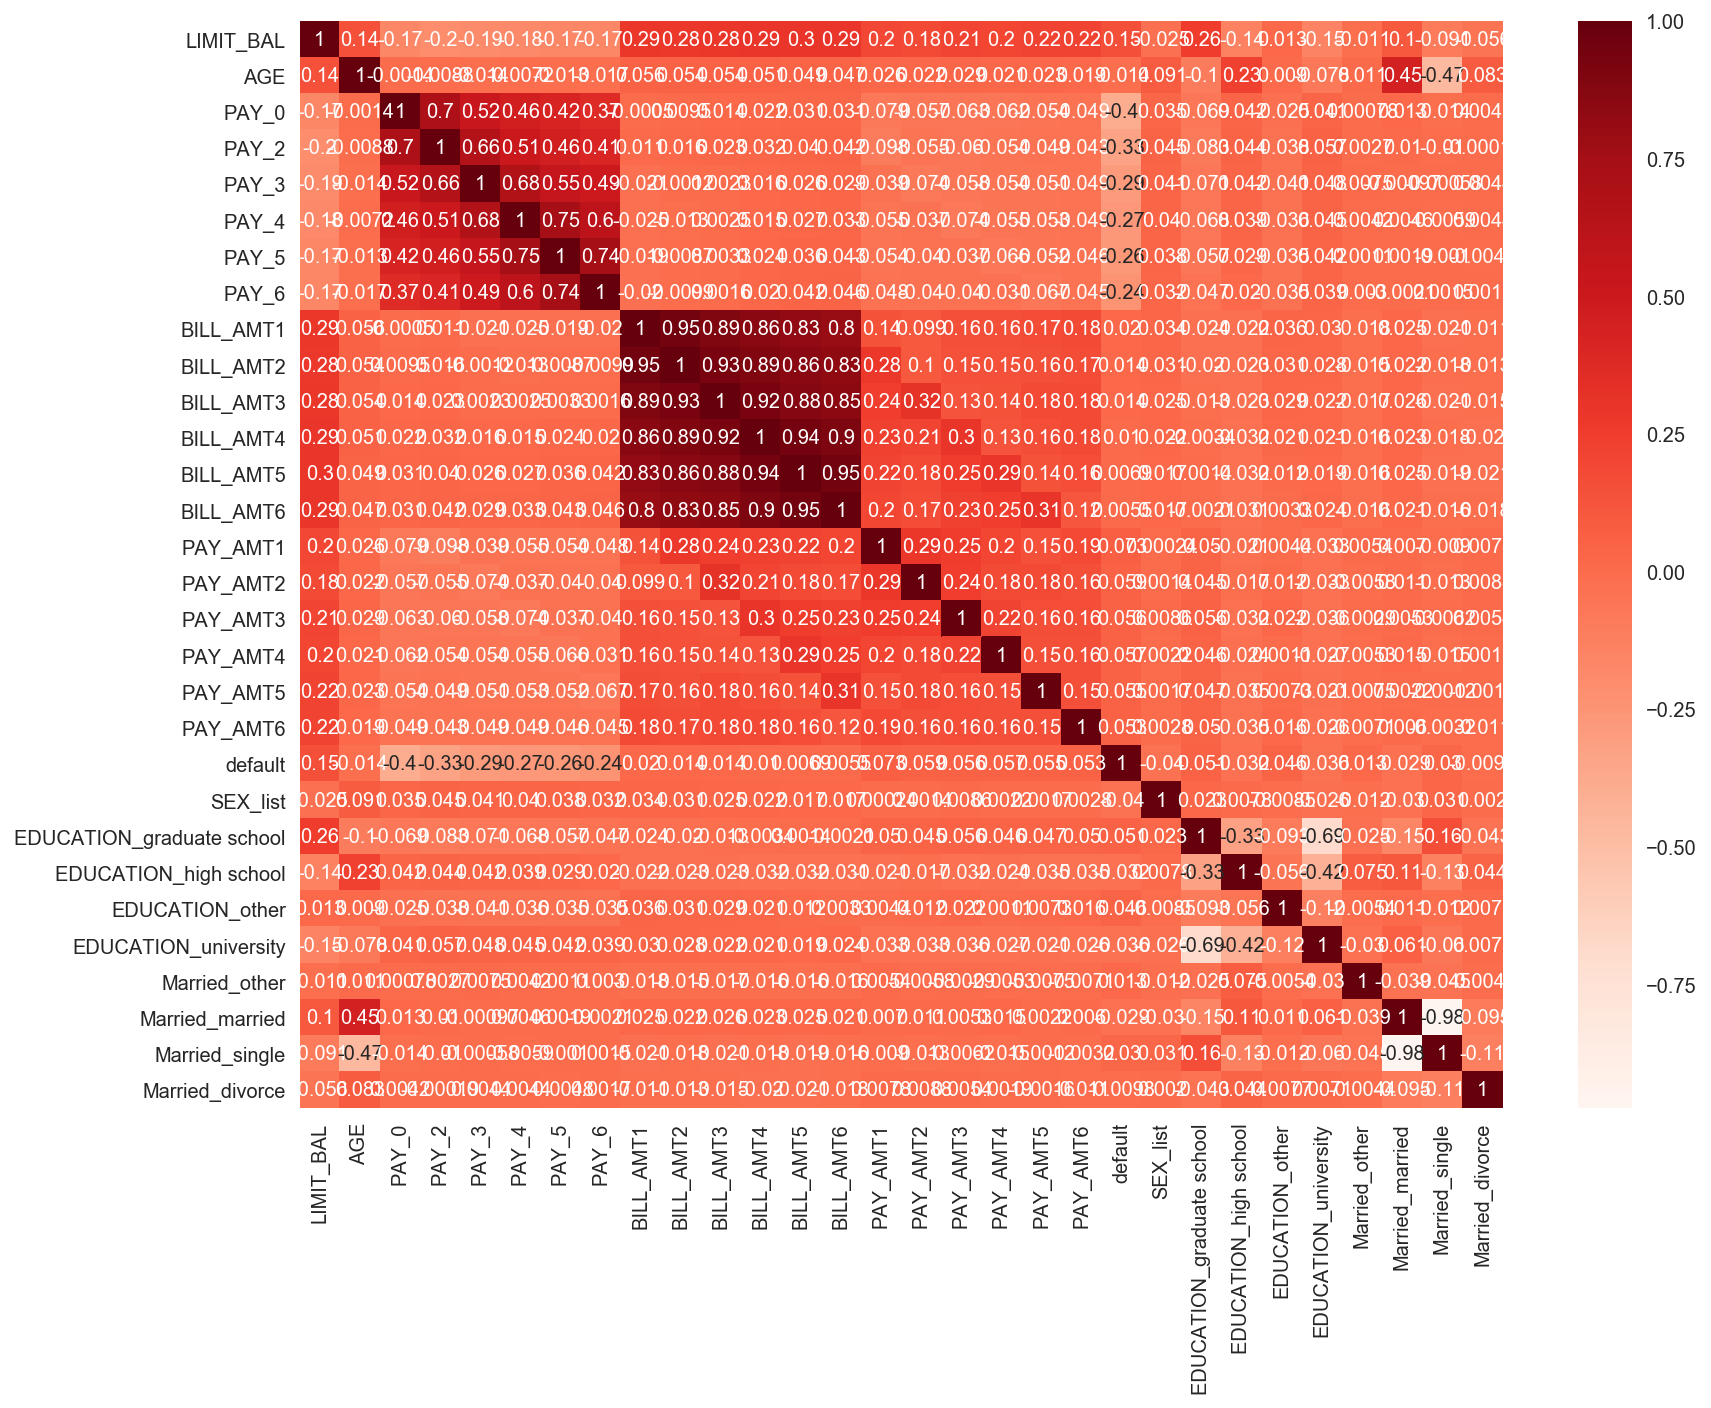

In [56]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
credit_corr = credit.corr()
sns.heatmap(credit_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [57]:
#Correlation with output variable
cor_target = abs(credit_corr['LIMIT_BAL'])
#Selecting highly correlated features
irrelevant_features = cor_target[cor_target<0.14]
irrelevant_features

SEX_list                 0.025015
EDUCATION_high school    0.139583
EDUCATION_other          0.013468
Married_other            0.011290
Married_married          0.103641
Married_single           0.090932
Married_divorce          0.055800
Name: LIMIT_BAL, dtype: float64

irrelevant_features gives you the set of features which has very less correlation with dependent feature. These features can be removed from the data set. 

In [58]:
credit = credit.drop(irrelevant_features.index,axis=1)
credit_samples = credit.sample(100)
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_sample= credit_samples.iloc[:,1:]
y_sample= credit_samples.iloc[:,:1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

## Using pipeline to find out the important features

Pipeline class allows sticking multiple processes into a single scikit-learn estimator. Pipeline class has fit, predict and score method just like any other estimator

In [59]:
credit_samples = credit.sample(100)
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_sample= credit_samples.iloc[:,1:]
y_sample= credit_samples.iloc[:,:1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

In [35]:
feature_names = X.columns

class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self
    
    
pipe = PipelineRFE(
    [
        ('std_scaler', preprocessing.StandardScaler()),
        ("ET", RandomForestRegressor(n_estimators = 500,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 123))
    ]
)



# Sets RNG seed to reproduce results (your results should match mine)
_ = StratifiedKFold(random_state=42)

feature_selector_cv = feature_selection.RFECV(pipe, cv=5, step=1, scoring="neg_mean_squared_error")
feature_selector_cv.fit(X_sample, y_sample)

feature_selector_cv.n_features_

22

In [36]:
cv_grid_rmse = np.sqrt(-feature_selector_cv.grid_scores_)
selected_features = feature_names[feature_selector_cv.support_].tolist()
selected_features

['AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default',
 'EDUCATION_graduate school',
 'EDUCATION_university']

selected_features gives you the set of features which is selected by the pipeline

The below gives graph of which features are important 

In [39]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df


# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [36]:
rf = RandomForestRegressor(n_estimators = 500,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 123)
model = rf
rf.fit(X_train, y_train)

print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))


R^2 Training Score: 0.92 
OOB Score: 0.46 
R^2 Validation Score: 0.47


In [39]:
print ("Features sorted by their score:")
base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp

Features sorted by their score:


,feature,feature_importance
0,PAY_AMT3,0.114261
1,PAY_AMT6,0.104657
2,AGE,0.095868
3,BILL_AMT1,0.094837
4,PAY_AMT2,0.087129
5,BILL_AMT4,0.073654
6,PAY_AMT1,0.064990
7,PAY_AMT5,0.059329
8,BILL_AMT3,0.058777
9,BILL_AMT2,0.053499


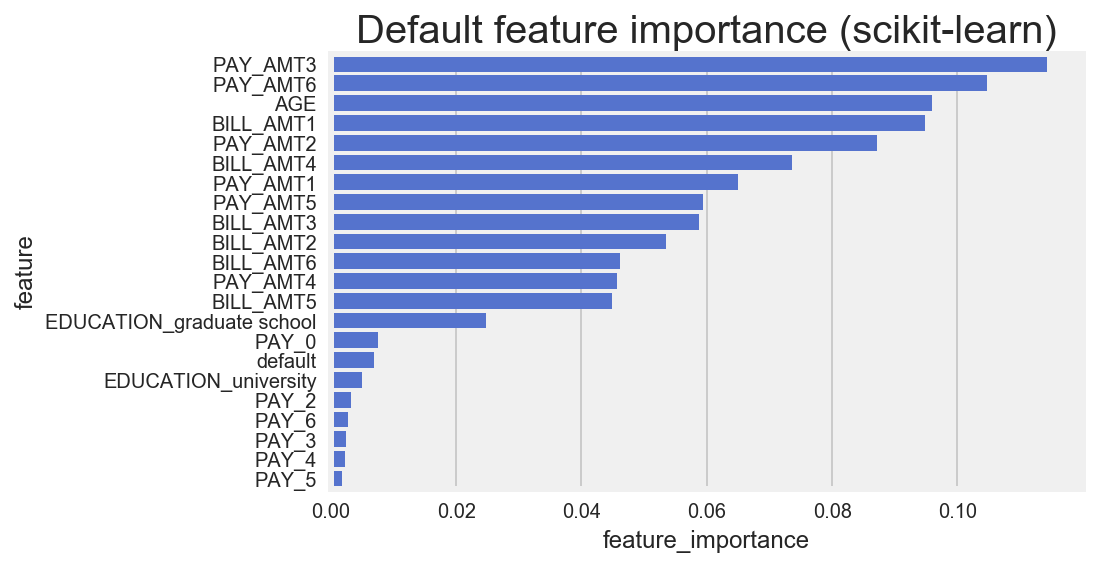

In [40]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

Let us see if there is any features which is making the model perform bad

In [60]:
from sklearn.base import clone 


def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

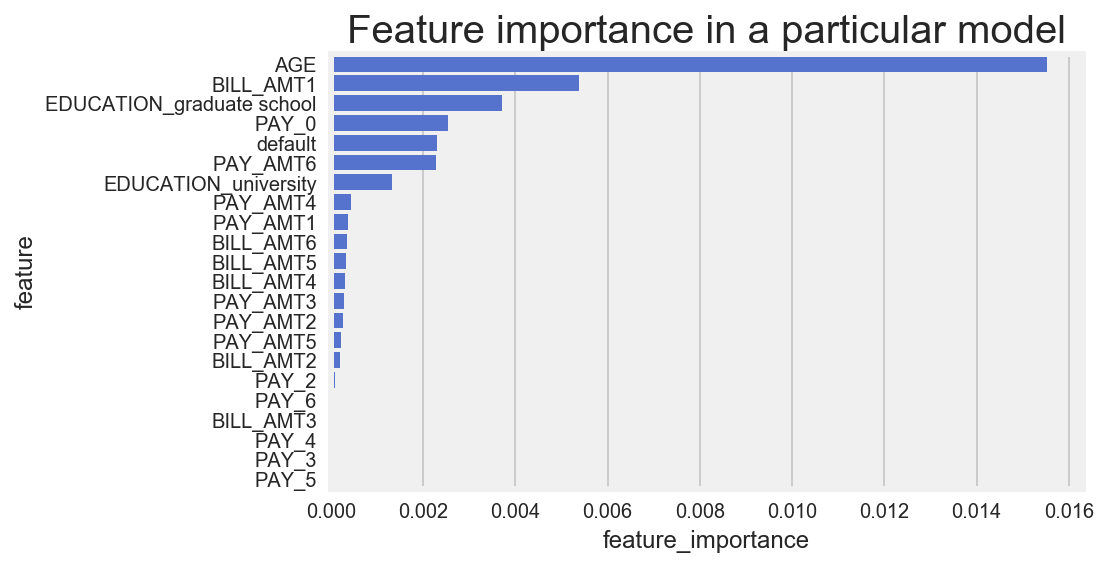

In [61]:
drop_imp = drop_col_feat_imp(rf, X_train, y_train)
var_imp_plot(drop_imp, 'Feature importance in a particular model')

In [62]:
drop_imp

,feature,feature_importance
0,AGE,0.015520
1,BILL_AMT1,0.005383
2,EDUCATION_graduate school,0.003708
3,PAY_0,0.002538
4,default,0.002295
5,PAY_AMT6,0.002274
6,EDUCATION_university,0.001328
7,PAY_AMT4,0.000441
8,PAY_AMT1,0.000379
9,BILL_AMT6,0.000343


From analysing the above "base_imp" & "drop_imp", we will remove the features which makes the model perform poor & the features with less importance

In [63]:
feature = credit.columns.tolist()
items_to_remove= ['EDUCATION_university','PAY_4','PAY_5','PAY_6',
                  'PAY_2','PAY_3','PAY_0','BILL_AMT4','BILL_AMT3']
feature = [item for item in feature if item not in items_to_remove]
feature

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default',
 'EDUCATION_graduate school']

In [64]:
credit_samples = credit[feature].sample(80)
X= credit[feature].iloc[:,1:]
y= credit[feature].iloc[:,:1]
X_sample= credit_samples.iloc[:,1:]
y_sample= credit_samples.iloc[:,:1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)
X_Strain,X_Stest,y_Strain,y_Stest = train_test_split(X_sample,y_sample,test_size=0.30,random_state=123)

In [46]:
pred = rf.fit(X_train, y_train).predict(X_test)
rmse = sqrt(mean_squared_error(y_test,pred))
rsquare = r2_score(y_test, pred)
print('R squared: %.3f '% rsquare)
print('RMSE: %.3f '% rmse)

R squared: 0.471 
RMSE: 94247.207 


In [ ]:
svr_rbf = SVR(kernel='rbf', C=60000,n_jobs=-1)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_rbf))
rsquare = r2_score(y_test, y_rbf)
print('R squared: %.3f '% rsquare)
print('RMSE: %.3f '% rmse)

The below shows how to use GridSearchCV to iterate through the SVR parameters & choose the best parameter for SVR

In [ ]:
param_grid = {'C':[1,1000], 'kernel':['linear','rbf']}
clf = GridSearchCV(SVR(),param_grid,refit = True, verbose=2,n_jobs=-1)
clf.fit(X_Strain,y_Strain)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
clf.best_params_

In [ ]:
predic = clf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,predic))
rsquare = r2_score(y_test, predic)
print('R squared: %.3f '% rsquare)
print('RMSE: %.3f '% rmse)

Using pipeline to see the best score

In [33]:
pipe = Pipeline([('scaler', StandardScaler()), ('svr', SVR(kernel='rbf', C=1000))])
pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(kernel='rbf', C=1000))])
pipe.score(X_test, y_test)

0.31036156114111346

In [73]:
model = GradientBoostingRegressor(criterion='friedman_mse', init=None,
          learning_rate=0.3, loss='ls', max_depth=3,
          max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=100, presort='auto', random_state=123,
          subsample=1.0, verbose=0, warm_start=False)
y_rbf = model.fit(X_train, y_train).predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_rbf))
rsquare = r2_score(y_test, y_rbf)
print('R squared: %.3f '% rsquare)
print('RMSE: %.3f '% rmse)

R squared: 0.471 
RMSE: 94163.121 


Th highest accurancy that we get 47%. There can be many reasons that we are not able to come up with a model to predict the limit bal from the features. One amoung them is the irregularity in pay status.

With that being said let us try Feature engineering on the data set & see what is the accuracy we are able to obtain for the model

## PCA

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

In [33]:
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

In [34]:
credit.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_graduate school', 'EDUCATION_university'],
      dtype='object')

In [35]:
# Separating out the target
features = X.columns.tolist()

PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set. To do this, execute the following code:

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X = sc.transform(X)

In [37]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_trainDf = pd.DataFrame(data = X_train)

The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. Execute the following line of code to find the "explained variance ratio".

In [38]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26199424, 0.18234502, 0.07863864, 0.06321465, 0.04739711])

In [40]:
ex_variance=np.var(X_train,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.41350777 0.28779671 0.12411604 0.09977222 0.07480726]


In [42]:
finalDf = pd.concat([ y,X_trainDf], axis = 1)
finalDf.head()

,LIMIT_BAL,0,1,2,3,4
0,20000.0,-0.943898,-0.487061,-0.882514,1.229820,0.602388
1,120000.0,-0.969733,-1.183697,1.535825,-0.426098,1.040577
2,90000.0,-0.987975,-0.901243,2.003427,0.809485,-1.652847
3,50000.0,-1.741139,0.735752,-1.246389,0.265097,-0.839082
4,50000.0,-1.172346,-1.221260,1.585619,-0.166933,0.518811


In [43]:
model = RandomForestRegressor(n_estimators=1000, random_state=123).fit(X_train, y_train).predict(X_test)
rmse = sqrt(mean_squared_error(y_test,model))
rsquare = r2_score(y_test, model)
print('R squared: %.3f '% rsquare)
print('RMSE: %.3f '% rmse)

R squared: 0.412 
RMSE: 99351.952 


In [44]:
svr_rbf = SVR(kernel='rbf', C=6000)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_rbf))
rsquare = r2_score(y_test, y_rbf)
print('R squared: %.3f '% rsquare)
print('RMSE: %.3f '% rmse)

R squared: 0.307 
RMSE: 107794.671 


In [45]:
model =GradientBoostingRegressor()
y_rbf = regr = model.fit(X_train, y_train).predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_rbf))
rsquare = r2_score(y_test, y_rbf)
print('R squared: %.3f '% rsquare)
print('RMSE: %.3f '% rmse)

R squared: 0.417 
RMSE: 98901.954 


41.7 % is the the highest model score achieved with 5 principal component & using the GradientBoostingRegressor algorithm

In this notebook, i would also like to discuss a whole new approach on this problem using pipeline

## Applying Pipeline from the start 

In [46]:
credit = pd.read_csv("default of credit card clients.csv", header=1)

In [47]:
credit['default'] = credit['default payment next month']

In [48]:
credit = credit.drop(['ID','default payment next month'], axis=1)
#overriding data set with the same data set after removing duplicate 
credit = credit.drop_duplicates()

In [49]:
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

Numeric transformer applies a StandardScaler, and includes a SimpleImputer to fill in any missing values.

The categorical transformer also has a SimpleImputer with a different fill method, and leverages OneHotEncoder to transform the categorical values into integers.

In [50]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Next we use the ColumnTransformer to apply the transformations to the correct columns in the dataframe. Before building this I have stored lists of the numeric and categorical columns using the pandas dtype method.

In [51]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

categorical_features = X.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Fitting the classifier

The next step is to create a pipeline that combines the preprocessor created above with a classifier. In this case I have used a simple RandomForestClassifier to start with.

In [52]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor())])

In [53]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [54]:
rf.score(X_test, y_test)

0.47410410756196947

In [55]:
regressors = [
    SVR(kernel="rbf", C=0.025),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
    ]
for regressor in regressors:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', regressor)])
    pipe.fit(X_train, y_train)   
    print(regressor)
    print("model score: %.3f" % pipe.score(X_test, y_test))

SVR(C=0.025, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
model score: -0.043
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
model score: -0.070
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None

From the above, we can understand "GradientBoostingRegressor" gives the score of 47.8%